# Project Data Mining: Analisis Biaya Asuransi

## Tujuan
Menganalisis faktor-faktor yang mempengaruhi biaya asuransi kesehatan menggunakan model linear regression.


## 1. Import Library yang Diperlukan


In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Set style untuk visualisasi (menggunakan style yang lebih kompatibel)
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        plt.style.use('default')
sns.set_palette("husl")

# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

print("Library berhasil diimport!")


Library berhasil diimport!


## 2. Data Summary
### Memuat dan Menjelajahi Dataset


In [2]:
# Memuat dataset
df = pd.read_csv('insurance.csv')

# Menampilkan informasi dasar dataset
print("=== INFORMASI DATASET ===")
print(f"Ukuran dataset: {df.shape[0]} baris dan {df.shape[1]} kolom")
print(f"\nNama kolom: {list(df.columns)}")
print("\n" + "="*50)

# Menampilkan 5 baris pertama
print("\n=== 5 BARIS PERTAMA ===")
df.head()


=== INFORMASI DATASET ===
Ukuran dataset: 1338 baris dan 7 kolom

Nama kolom: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


=== 5 BARIS PERTAMA ===


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Informasi lengkap tentang dataset
print("=== INFORMASI LENGKAP DATASET ===")
df.info()


=== INFORMASI LENGKAP DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Statistik deskriptif
print("=== STATISTIK DESKRIPTIF ===")
df.describe()


=== STATISTIK DESKRIPTIF ===


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Memeriksa missing values
print("=== MISSING VALUES ===")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


=== MISSING VALUES ===
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Total missing values: 0


In [6]:
# Menampilkan distribusi variabel kategorikal
print("=== DISTRIBUSI VARIABEL KATEGORIKAL ===")
print("\nJenis Kelamin:")
print(df['sex'].value_counts())
print("\nStatus Merokok:")
print(df['smoker'].value_counts())
print("\nWilayah:")
print(df['region'].value_counts())


=== DISTRIBUSI VARIABEL KATEGORIKAL ===

Jenis Kelamin:
sex
male      676
female    662
Name: count, dtype: int64

Status Merokok:
smoker
no     1064
yes     274
Name: count, dtype: int64

Wilayah:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### Ringkasan Data Summary

**Ukuran Dataset:** Dataset terdiri dari 1338 baris dan 7 kolom.

**Variabel Kunci:**
- **age**: Umur (numerik)
- **sex**: Jenis kelamin (kategorikal: male/female)
- **bmi**: Body Mass Index (numerik)
- **children**: Jumlah anak (numerik)
- **smoker**: Status merokok (kategorikal: yes/no)
- **region**: Wilayah (kategorikal: northeast/northwest/southeast/southwest)

**Target Variable:**
- **charges**: Biaya asuransi kesehatan (numerik) - ini adalah variabel yang ingin kita prediksi


## 3. Objective of the Analysis

**Tujuan Analisis:**
Membangun model linear regression untuk memprediksi biaya asuransi kesehatan berdasarkan faktor-faktor seperti umur, BMI, status merokok, dan faktor lainnya. Analisis ini bertujuan untuk:

1. Memahami faktor-faktor apa saja yang paling berpengaruh terhadap biaya asuransi
2. Membuat model prediksi yang dapat memperkirakan biaya asuransi untuk calon nasabah baru
3. Memberikan insight kepada perusahaan asuransi untuk menentukan strategi pricing


## 4. Exploratory Data Analysis (EDA)


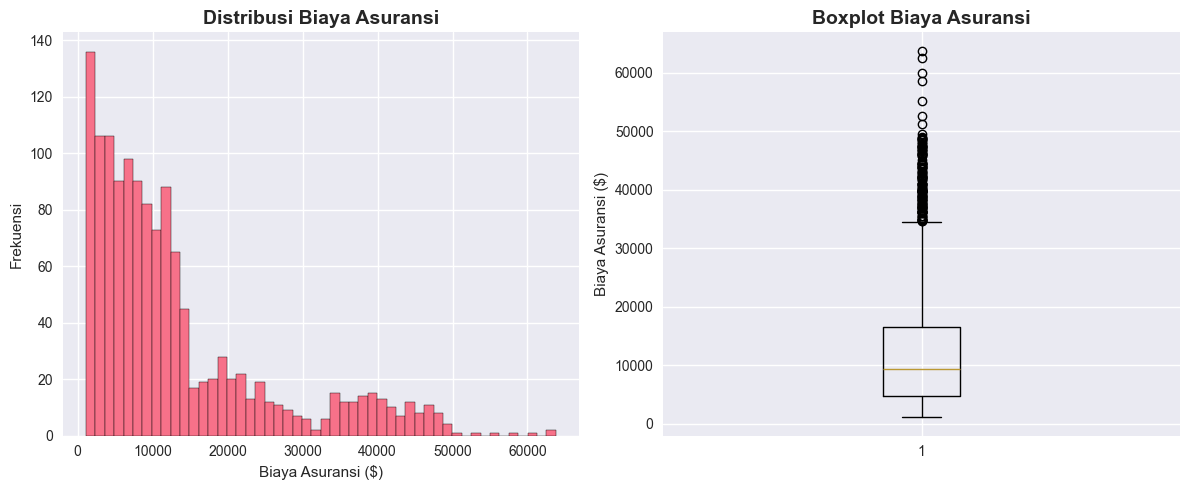

Rata-rata biaya: $13270.42
Median biaya: $9382.03
Standar deviasi: $12110.01


In [7]:
# Visualisasi distribusi target variable (charges)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=50, edgecolor='black')
plt.title('Distribusi Biaya Asuransi', fontsize=14, fontweight='bold')
plt.xlabel('Biaya Asuransi ($)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.title('Boxplot Biaya Asuransi', fontsize=14, fontweight='bold')
plt.ylabel('Biaya Asuransi ($)')

plt.tight_layout()
plt.show()

print(f"Rata-rata biaya: ${df['charges'].mean():.2f}")
print(f"Median biaya: ${df['charges'].median():.2f}")
print(f"Standar deviasi: ${df['charges'].std():.2f}")


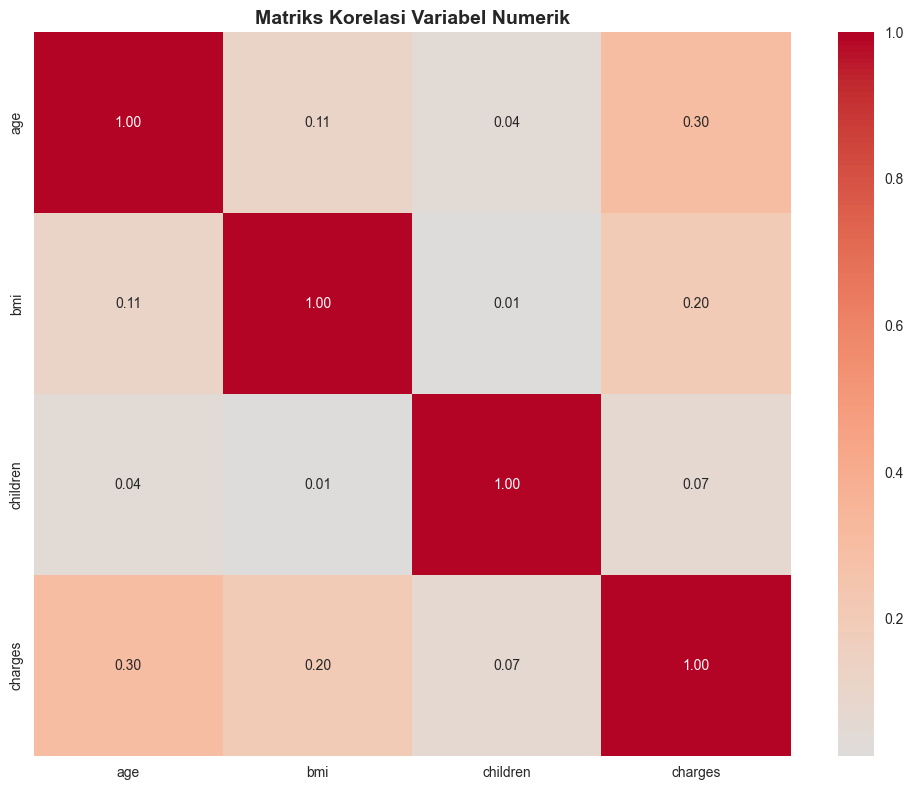

In [8]:
# Korelasi antara variabel numerik
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Variabel Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


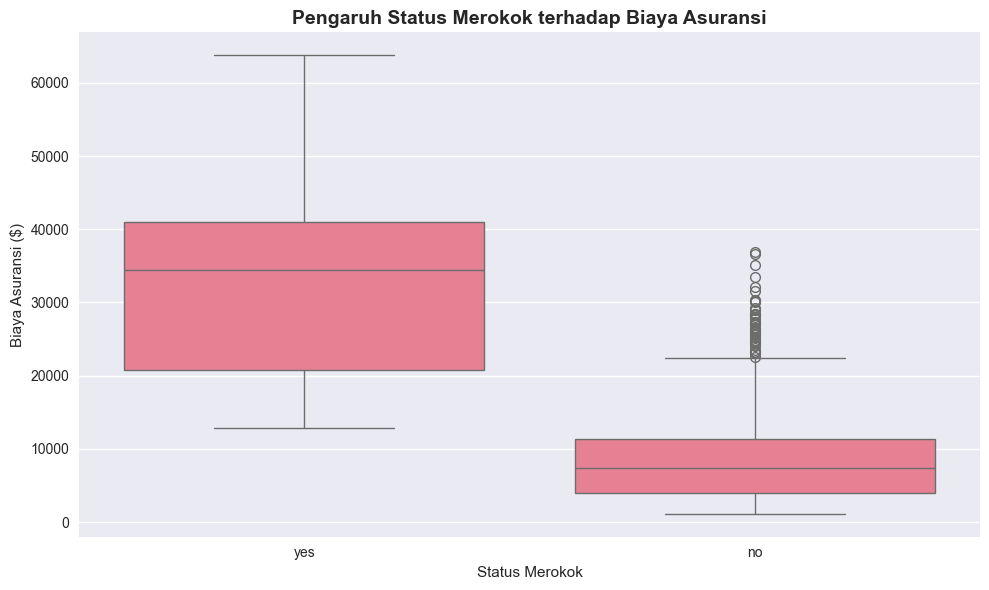

Rata-rata biaya berdasarkan status merokok:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [9]:
# Pengaruh status merokok terhadap biaya
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Pengaruh Status Merokok terhadap Biaya Asuransi', fontsize=14, fontweight='bold')
plt.xlabel('Status Merokok')
plt.ylabel('Biaya Asuransi ($)')
plt.tight_layout()
plt.show()

print("Rata-rata biaya berdasarkan status merokok:")
print(df.groupby('smoker')['charges'].mean())


## 5. Data Preprocessing


In [10]:
# Membuat copy dataset untuk preprocessing
df_processed = df.copy()

# Encoding variabel kategorikal
# Menggunakan Label Encoding untuk variabel kategorikal
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_processed['sex_encoded'] = le_sex.fit_transform(df_processed['sex'])
df_processed['smoker_encoded'] = le_smoker.fit_transform(df_processed['smoker'])
df_processed['region_encoded'] = le_region.fit_transform(df_processed['region'])

# Menampilkan hasil encoding
print("=== HASIL ENCODING ===")
print("\nSex encoding:")
print(dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print("\nSmoker encoding:")
print(dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_))))
print("\nRegion encoding:")
print(dict(zip(le_region.classes_, le_region.transform(le_region.classes_))))

# Menampilkan beberapa baris hasil preprocessing
print("\n=== DATA SETELAH PREPROCESSING ===")
df_processed[['age', 'sex', 'sex_encoded', 'bmi', 'children', 'smoker', 'smoker_encoded', 
              'region', 'region_encoded', 'charges']].head()


=== HASIL ENCODING ===

Sex encoding:
{'female': np.int64(0), 'male': np.int64(1)}

Smoker encoding:
{'no': np.int64(0), 'yes': np.int64(1)}

Region encoding:
{'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}

=== DATA SETELAH PREPROCESSING ===


,age,sex,sex_encoded,bmi,children,smoker,smoker_encoded,region,region_encoded,charges
0,19,female,0,27.900,0,yes,1,southwest,3,16884.92400
1,18,male,1,33.770,1,no,0,southeast,2,1725.55230
2,28,male,1,33.000,3,no,0,southeast,2,4449.46200
3,33,male,1,22.705,0,no,0,northwest,1,21984.47061
4,32,male,1,28.880,0,no,0,northwest,1,3866.85520


In [11]:
# Memisahkan features dan target
# Model 1: Hanya variabel numerik asli
X1 = df_processed[['age', 'bmi', 'children']]
y = df_processed['charges']

# Model 2: Variabel numerik + encoded categorical
X2 = df_processed[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']]

# Model 3: Variabel numerik + smoker (faktor penting)
X3 = df_processed[['age', 'bmi', 'children', 'smoker_encoded']]

print("Features untuk Model 1 (hanya numerik):", list(X1.columns))
print("Features untuk Model 2 (semua variabel):", list(X2.columns))
print("Features untuk Model 3 (numerik + smoker):", list(X3.columns))


Features untuk Model 1 (hanya numerik): ['age', 'bmi', 'children']
Features untuk Model 2 (semua variabel): ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']
Features untuk Model 3 (numerik + smoker): ['age', 'bmi', 'children', 'smoker_encoded']


## 6. Model Comparison
### Membandingkan Beberapa Variasi Linear Regression


In [12]:
# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(X, y, model_name):
    """
    Fungsi untuk melatih model linear regression dan mengevaluasi performanya
    """
    # Membagi data menjadi training dan testing set (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Membuat dan melatih model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluasi
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Menampilkan koefisien
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
    coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)
    
    return {
        'model_name': model_name,
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'coefficients': coefficients,
        'X_test': X_test,
        'y_test': y_test,
        'y_test_pred': y_test_pred
    }


In [13]:
# Melatih ketiga model
print("Melatih Model 1: Hanya variabel numerik (age, bmi, children)...")
results1 = train_and_evaluate(X1, y, "Model 1: Numerik Saja")

print("\nMelatih Model 2: Semua variabel (termasuk categorical encoded)...")
results2 = train_and_evaluate(X2, y, "Model 2: Semua Variabel")

print("\nMelatih Model 3: Numerik + Smoker...")
results3 = train_and_evaluate(X3, y, "Model 3: Numerik + Smoker")

print("\nSemua model selesai dilatih!")


Melatih Model 1: Hanya variabel numerik (age, bmi, children)...

Melatih Model 2: Semua variabel (termasuk categorical encoded)...

Melatih Model 3: Numerik + Smoker...

Semua model selesai dilatih!


In [14]:
# Membandingkan hasil ketiga model
comparison = pd.DataFrame({
    'Model': [results1['model_name'], results2['model_name'], results3['model_name']],
    'Train R²': [results1['train_r2'], results2['train_r2'], results3['train_r2']],
    'Test R²': [results1['test_r2'], results2['test_r2'], results3['test_r2']],
    'Train RMSE': [results1['train_rmse'], results2['train_rmse'], results3['train_rmse']],
    'Test RMSE': [results1['test_rmse'], results2['test_rmse'], results3['test_rmse']],
    'Train MAE': [results1['train_mae'], results2['train_mae'], results3['train_mae']],
    'Test MAE': [results1['test_mae'], results2['test_mae'], results3['test_mae']]
})

print("=== PERBANDINGAN MODEL ===")
print(comparison.round(4))

# Menentukan model terbaik berdasarkan R² score pada test set
best_model_idx = comparison['Test R²'].idxmax()
best_model_name = comparison.loc[best_model_idx, 'Model']
print(f"\n=== MODEL TERBAIK ===")
print(f"Model terbaik: {best_model_name}")
print(f"Test R² Score: {comparison.loc[best_model_idx, 'Test R²']:.4f}")


=== PERBANDINGAN MODEL ===
                       Model  Train R²  Test R²  Train RMSE   Test RMSE  \
0      Model 1: Numerik Saja    0.1099   0.1549  11334.6816  11454.3152   
1    Model 2: Semua Variabel    0.7417   0.7833   6105.7893   5799.5871   
2  Model 3: Numerik + Smoker    0.7411   0.7811   6113.0678   5829.3785   

   Train MAE   Test MAE  
0  9005.9032  9181.3116  
1  4208.7620  4186.5089  
2  4210.6641  4213.7986  

=== MODEL TERBAIK ===
Model terbaik: Model 2: Semua Variabel
Test R² Score: 0.7833


In [15]:
# Menampilkan koefisien model terbaik
if best_model_name == results1['model_name']:
    best_results = results1
elif best_model_name == results2['model_name']:
    best_results = results2
else:
    best_results = results3

print(f"=== KOEFISIEN MODEL TERBAIK ({best_model_name}) ===")
print(best_results['coefficients'])
print(f"\nIntercept: {best_results['model'].intercept_:.2f}")


=== KOEFISIEN MODEL TERBAIK (Model 2: Semua Variabel) ===
          Feature   Coefficient  Abs_Coefficient
4  smoker_encoded  23647.818096     23647.818096
2        children    425.091456       425.091456
1             bmi    335.781491       335.781491
5  region_encoded   -271.284266       271.284266
0             age    257.056264       257.056264
3     sex_encoded    -18.791457        18.791457

Intercept: -11946.61


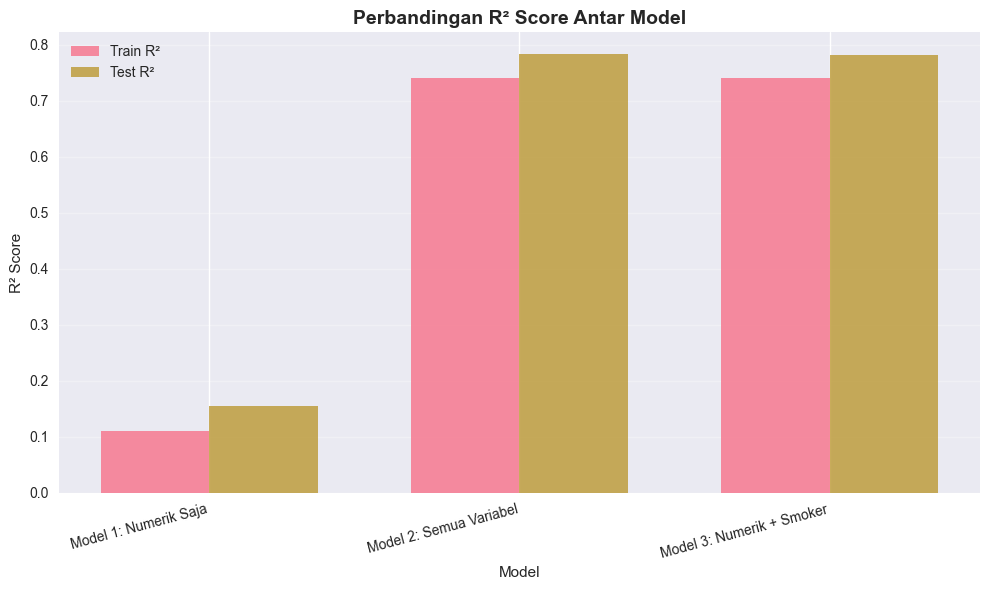

In [16]:
# Visualisasi perbandingan R² Score
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(comparison))
width = 0.35

plt.bar(x_pos - width/2, comparison['Train R²'], width, label='Train R²', alpha=0.8)
plt.bar(x_pos + width/2, comparison['Test R²'], width, label='Test R²', alpha=0.8)

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Perbandingan R² Score Antar Model', fontsize=14, fontweight='bold')
plt.xticks(x_pos, comparison['Model'], rotation=15, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


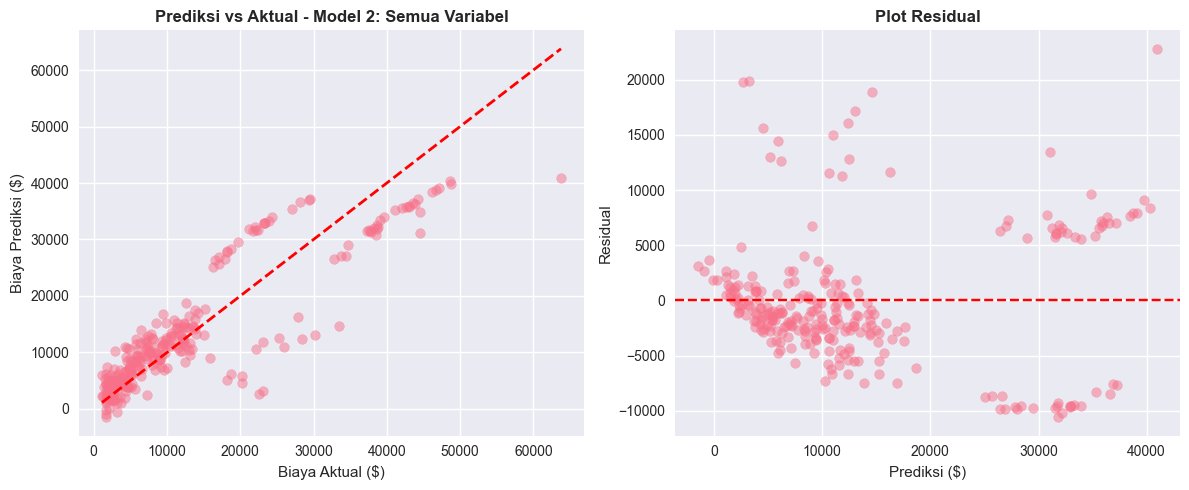

In [17]:
# Visualisasi prediksi vs aktual untuk model terbaik
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(best_results['y_test'], best_results['y_test_pred'], alpha=0.5)
plt.plot([best_results['y_test'].min(), best_results['y_test'].max()], 
         [best_results['y_test'].min(), best_results['y_test'].max()], 'r--', lw=2)
plt.xlabel('Biaya Aktual ($)')
plt.ylabel('Biaya Prediksi ($)')
plt.title(f'Prediksi vs Aktual - {best_model_name}', fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
residuals = best_results['y_test'] - best_results['y_test_pred']
plt.scatter(best_results['y_test_pred'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prediksi ($)')
plt.ylabel('Residual')
plt.title('Plot Residual', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Key Findings

### Temuan Utama dari Analisis:


In [18]:
print("=== TEMUAN UTAMA ===")
print(f"\n1. Model Terbaik: {best_model_name}")
print(f"   - R² Score pada test set: {best_results['test_r2']:.4f}")
print(f"   - RMSE pada test set: ${best_results['test_rmse']:.2f}")
print(f"   - MAE pada test set: ${best_results['test_mae']:.2f}")

print(f"\n2. Faktor Paling Berpengaruh (berdasarkan koefisien):")
for idx, row in best_results['coefficients'].head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Coefficient']:.2f}")

print(f"\n3. Interpretasi:")
print(f"   - Model dapat menjelaskan {best_results['test_r2']*100:.2f}% variasi dalam biaya asuransi")
print(f"   - Rata-rata error prediksi: ${best_results['test_mae']:.2f}")

# Analisis pengaruh smoker
if 'smoker_encoded' in best_results['coefficients']['Feature'].values:
    smoker_coef = best_results['coefficients'][best_results['coefficients']['Feature'] == 'smoker_encoded']['Coefficient'].values[0]
    print(f"\n4. Pengaruh Status Merokok:")
    print(f"   - Koefisien smoker: {smoker_coef:.2f}")
    print(f"   - Artinya: Perokok memiliki biaya ${abs(smoker_coef):.2f} lebih tinggi daripada non-perokok (ceteris paribus)")


=== TEMUAN UTAMA ===

1. Model Terbaik: Model 2: Semua Variabel
   - R² Score pada test set: 0.7833
   - RMSE pada test set: $5799.59
   - MAE pada test set: $4186.51

2. Faktor Paling Berpengaruh (berdasarkan koefisien):
   - smoker_encoded: 23647.82
   - children: 425.09
   - bmi: 335.78

3. Interpretasi:
   - Model dapat menjelaskan 78.33% variasi dalam biaya asuransi
   - Rata-rata error prediksi: $4186.51

4. Pengaruh Status Merokok:
   - Koefisien smoker: 23647.82
   - Artinya: Perokok memiliki biaya $23647.82 lebih tinggi daripada non-perokok (ceteris paribus)


### Insight Bisnis:

1. **Status Merokok** adalah faktor paling signifikan dalam menentukan biaya asuransi
2. **Umur** memiliki hubungan positif dengan biaya asuransi - semakin tua, semakin tinggi biayanya
3. **BMI** juga berkontribusi terhadap biaya asuransi
4. Model yang menggunakan semua variabel atau variabel numerik + smoker memberikan performa yang lebih baik


## 8. Limitations and Next Steps

### Keterbatasan Model:

1. **Linear Regression Asumsi:** Model mengasumsikan hubungan linear antara variabel, padahal mungkin ada hubungan non-linear
2. **R² Score:** Meskipun model terbaik memiliki R² yang cukup baik, masih ada variasi yang tidak dapat dijelaskan oleh model
3. **Outliers:** Dataset mungkin memiliki outliers yang mempengaruhi performa model
4. **Feature Engineering:** Belum dilakukan transformasi atau feature engineering yang lebih kompleks
5. **Interaksi Features:** Model tidak menangkap interaksi antar variabel secara eksplisit

### Langkah Selanjutnya:

1. **Feature Engineering:**
   - Membuat variabel interaksi (misalnya: age × bmi, smoker × bmi)
   - Transformasi variabel (polynomial features)
   - Normalisasi/standardisasi data

2. **Model Alternatif:**
   - Mencoba model non-linear seperti Random Forest, Gradient Boosting
   - Polynomial Regression untuk menangkap non-linearitas
   - Regularized regression (Ridge, Lasso) untuk mengurangi overfitting

3. **Data Improvement:**
   - Mengumpulkan lebih banyak data
   - Menambahkan variabel lain yang relevan (riwayat penyakit, aktivitas fisik, dll)
   - Menangani outliers dengan lebih baik

4. **Validasi:**
   - Cross-validation untuk validasi yang lebih robust
   - Validasi pada data baru yang belum pernah dilihat model

5. **Interpretasi Lebih Dalam:**
   - Analisis residual yang lebih detail
   - Feature importance analysis
   - Partial dependence plots


## 9. Kesimpulan

Dari analisis ini, kita telah berhasil:

1. ✅ Menjelajahi dan memahami dataset asuransi
2. ✅ Membandingkan 3 variasi model linear regression
3. ✅ Mengidentifikasi model terbaik berdasarkan R² score
4. ✅ Menemukan faktor-faktor yang paling berpengaruh terhadap biaya asuransi
5. ✅ Memberikan insight yang dapat digunakan untuk pengambilan keputusan

Model linear regression memberikan baseline yang baik untuk prediksi biaya asuransi, dengan status merokok sebagai faktor paling dominan. Untuk meningkatkan akurasi lebih lanjut, disarankan untuk mencoba model yang lebih kompleks dan melakukan feature engineering yang lebih mendalam.
